<a href="https://colab.research.google.com/github/AirDronzer/keras/blob/master/Cifarkeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

import tensorflow as tf
import numpy as np
import keras
from tensorflow.keras import backend
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.datasets import cifar10
from IPython.display import display
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
from tensorflow.python.framework import ops
from tensorflow.keras.callbacks import TensorBoard


Using TensorFlow backend.


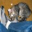

In [20]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data() 
label=['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']
dis=array_to_img(x_test[0])
display(dis)
img=x_test[0]

In [0]:
x_train,x_test=x_train/255.0,x_test/255.0

In [0]:
x_train=x_train.reshape(x_train.shape[0],32*32*3)

#Converting 4 row array into 2 row for both shown above


In [0]:
x_test=x_test.reshape(len(x_test),32*32*3)

Creating Validation Data

In [0]:
x_val=x_train[:1000]
### Created 1000 images vaslidation
y_val=y_train[:1000]

In [0]:
### Defining our Neural Network
model1=Sequential([
                   Dense(units=128,input_dim=3072,activation='relu'),
                   Dense(64,activation='relu'),
                   Dense(16,activation='relu'),
                   Dense(10,activation='softmax')
])

In [9]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               393344    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                170       
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


In [0]:
### TensorBoard
####so SKipping for Nwow
y_train.shape
model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [12]:
##fiting the model

%%time

model1.fit(x_train,y_train,batch_size=5000,epochs=150,validation_data=(x_val,y_val),validation_batch_size=1000)

Epoch 1/150
10/10 [==============================] - 2s 192ms/step - loss: 1.3175 - accuracy: 0.5267 - val_loss: 1.2801 - val_accuracy: 0.5540
Epoch 2/150
10/10 [==============================] - 2s 178ms/step - loss: 1.3130 - accuracy: 0.5280 - val_loss: 1.2711 - val_accuracy: 0.5640
Epoch 3/150
10/10 [==============================] - 2s 180ms/step - loss: 1.3086 - accuracy: 0.5291 - val_loss: 1.2697 - val_accuracy: 0.5660
Epoch 4/150
10/10 [==============================] - 2s 179ms/step - loss: 1.3094 - accuracy: 0.5283 - val_loss: 1.2525 - val_accuracy: 0.5550
Epoch 5/150
10/10 [==============================] - 2s 179ms/step - loss: 1.3202 - accuracy: 0.5221 - val_loss: 1.2773 - val_accuracy: 0.5480
Epoch 6/150
10/10 [==============================] - 2s 179ms/step - loss: 1.3162 - accuracy: 0.5251 - val_loss: 1.2663 - val_accuracy: 0.5560
Epoch 7/150
10/10 [==============================] - 2s 179ms/step - loss: 1.3132 - accuracy: 0.5268 - val_loss: 1.2601 - val_accuracy: 0.5580

In [27]:
test =np.expand_dims(x_val[0],axis=0)

np.set_printoptions(precision=3)
model1.predict(test)

array([[1.176e-02, 1.541e-02, 2.085e-02, 4.928e-02, 2.124e-02, 1.587e-02,
        8.557e-01, 4.462e-03, 6.303e-04, 4.756e-03]], dtype=float32)

In [28]:
model1.predict_classes(test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([6])

In [29]:
for num in range(10):
  test_img =np.expand_dims(x_val[num],axis=0)
  predict_val=model1.predict_classes(test_img)[0]
  print(f'Actual Val{y_val[num]} vs Predicted val{predict_val}')


Actual Val[6] vs Predicted val6
Actual Val[9] vs Predicted val9
Actual Val[9] vs Predicted val9
Actual Val[4] vs Predicted val4
Actual Val[1] vs Predicted val1
Actual Val[1] vs Predicted val1
Actual Val[2] vs Predicted val2
Actual Val[7] vs Predicted val7
Actual Val[8] vs Predicted val8
Actual Val[3] vs Predicted val7
